In [42]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import mysql.connector

In [2]:
# Read in the dataset
airbnb = pd.read_json("sample_airbnb.json")

In [ ]:
airbnb

In [6]:
# Transform Airbnb DataFrame into a list of dictionaries

airbnb_data = []
for i, row in airbnb.iterrows():
    data = dict(Id=row['_id'],
                Listing_url=row['listing_url'],
                Name=row['name'],
                Property_type=row['property_type'],
                Room_type=row['room_type'],
                Min_nights=int(row['minimum_nights']),
                Max_nights=int(row['maximum_nights']),
                Cancellation_policy=row['cancellation_policy'],
                Accommodates=row['accommodates'],
                Total_bedrooms=row.get('bedrooms'),
                Total_beds=row.get('beds'),
                Availability_365=row['availability']['availability_365'],
                Price=row['price'],
                Security_deposit=row.get('security_deposit'),
                Cleaning_fee=row.get('cleaning_fee'),
                Guests_included=row['guests_included'],
                No_of_reviews=row['number_of_reviews'],
                Review_scores=row['review_scores'].get('review_scores_rating'),
                Amenities=', '.join(row['amenities']),
                Host_id=row['host']['host_id'],
                Host_name=row['host']['host_name'],
                Country=row['address']['country'],
                Longitude=row['address']['location']['coordinates'][0],
                Latitude=row['address']['location']['coordinates'][1],
                Is_location_exact=row['address']['location']['is_location_exact']
                )
    airbnb_data.append(data)

In [9]:
df=pd.DataFrame(airbnb_data)
df

,Id,Listing_url,Name,Property_type,Room_type,Min_nights,Max_nights,Cancellation_policy,Accommodates,Total_bedrooms,...,Guests_included,No_of_reviews,Review_scores,Amenities,Host_id,Host_name,Country,Longitude,Latitude,Is_location_exact
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,Apartment,Private room,12,360,strict_14_with_grace_period,2,1.0,...,1,70,94.0,"Internet, Wifi, Air conditioning, Kitchen, Ele...",454250,Greta,United States,-73.965230,40.799620,False
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,Bed and breakfast,Private room,1,1125,moderate,3,1.0,...,1,29,92.0,"Internet, Wifi, Air conditioning, Free parking...",52004703,Mehmet Emin,Turkey,28.980090,41.006200,False
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient",Apartment,Entire home/apt,4,20,flexible,3,1.0,...,1,3,100.0,"Air conditioning, Kitchen, Smoking allowed, Do...",51624384,Giovanni,Hong Kong,114.150270,22.281580,True
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,Guesthouse,Private room,1,500,strict_14_with_grace_period,1,1.0,...,1,81,92.0,"TV, Wifi, Air conditioning, Kitchen, Elevator,...",51744313,Yi,Hong Kong,114.166900,22.331400,True
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,Apartment,Entire home/apt,10,21,strict_14_with_grace_period,2,0.0,...,1,64,95.0,"TV, Wifi, Kitchen, Elevator, Heating, Washer, ...",13764143,Ben,Australia,151.215540,-33.880290,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,House,Entire home/apt,1,1125,flexible,2,2.0,...,1,0,NaN,"TV, Cable TV, Internet, Wifi, Kitchen, Buzzer/...",51303748,Eren,Turkey,29.030790,40.985630,False
5551,9993190,https://www.airbnb.com/rooms/9993190,Just Steps from the Ocean at Premier Platinum ...,Townhouse,Entire home/apt,3,365,strict_14_with_grace_period,6,2.0,...,1,15,92.0,"TV, Wifi, Air conditioning, Pool, Kitchen, Fre...",51013381,Coconut Condos,United States,-156.667520,20.858940,False
5552,9887054,https://www.airbnb.com/rooms/9887054,Quarry Bay fully furnished studio C,Apartment,Private room,3,1125,flexible,1,1.0,...,2,4,85.0,"TV, Wifi, Air conditioning, Kitchen, Elevator,...",31386255,Cat,Hong Kong,114.207220,22.291570,False
5553,9907907,https://www.airbnb.com/rooms/9907907,Large double room in Bondi,Apartment,Private room,3,1125,moderate,2,1.0,...,2,0,NaN,"TV, Internet, Wifi, Kitchen, Washer, Dryer, Sm...",47615848,Lucy,Australia,151.265420,-33.892980,False


In [10]:
df.columns

Index(['Id', 'Listing_url', 'Name', 'Property_type', 'Room_type', 'Min_nights',
       'Max_nights', 'Cancellation_policy', 'Accommodates', 'Total_bedrooms',
       'Total_beds', 'Availability_365', 'Price', 'Security_deposit',
       'Cleaning_fee', 'Guests_included', 'No_of_reviews', 'Review_scores',
       'Amenities', 'Host_id', 'Host_name', 'Country', 'Longitude', 'Latitude',
       'Is_location_exact'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5555 non-null   int64  
 1   Listing_url          5555 non-null   object 
 2   Name                 5555 non-null   object 
 3   Property_type        5555 non-null   object 
 4   Room_type            5555 non-null   object 
 5   Min_nights           5555 non-null   int64  
 6   Max_nights           5555 non-null   int64  
 7   Cancellation_policy  5555 non-null   object 
 8   Accommodates         5555 non-null   int64  
 9   Total_bedrooms       5550 non-null   float64
 10  Total_beds           5542 non-null   float64
 11  Availability_365     5555 non-null   int64  
 12  Price                5555 non-null   int64  
 13  Security_deposit     3471 non-null   float64
 14  Cleaning_fee         4024 non-null   float64
 15  Guests_included      5555 non-null   i

In [12]:
# Handling missing values
df['Name'] = df['Name'].fillna('Unknown')
#df['House_rules'] = df['House_rules'].fillna('No house rules available')
df['Host_name'] = df['Host_name'].fillna('Unknown')
#df['Amenities'] =  df['Amenities'].fillna('Not available')

In [13]:
df['Amenities']= df['Amenities'].replace('', 'Not available')
df['Amenities']= df['Amenities'].fillna('Not available')

In [14]:
# Assuming '0' for missing values in Price, Extra_people, and Guests_included
df['Price'] = df['Price'].fillna(0).astype(int)
df['Guests_included'] = df['Guests_included'].fillna(0).astype(int)

# Converting columns to float after handling missing values
df['Security_deposit'] = df['Security_deposit'].fillna(0).astype(int)
df['Cleaning_fee'] = df['Cleaning_fee'].fillna(0).astype(int)
df['Total_beds'] = df['Total_beds'].fillna(0).astype(int)
df['Total_bedrooms'] = df['Total_bedrooms'].fillna(0).astype(int)

# Imputing missing values for Total_beds and Total_bedrooms and Review_Scores with median
median_review_scores = df['Review_scores'].median()
df['Review_scores'] = df['Review_scores'].fillna(median_review_scores)

In [ ]:
df.info()

In [16]:
df.isna().sum()

Id                     0
Listing_url            0
Name                   0
Property_type          0
Room_type              0
Min_nights             0
Max_nights             0
Cancellation_policy    0
Accommodates           0
Total_bedrooms         0
Total_beds             0
Availability_365       0
Price                  0
Security_deposit       0
Cleaning_fee           0
Guests_included        0
No_of_reviews          0
Review_scores          0
Amenities              0
Host_id                0
Host_name              0
Country                0
Longitude              0
Latitude               0
Is_location_exact      0
dtype: int64

In [17]:
df.to_csv('Airbnb_data.csv',index=False)

# Exploratory Data Analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_5740\76281392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df['Property_type'].value_counts().head(10).index,


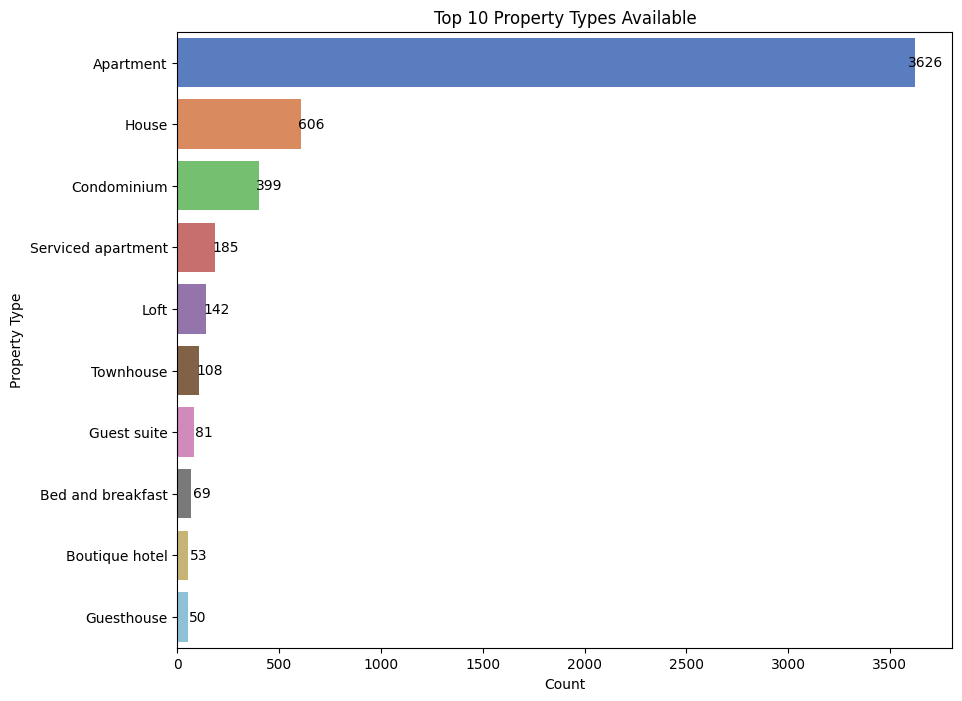

In [23]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=df['Property_type'].value_counts().head(10).index,
                 x=df['Property_type'].value_counts().head(10),
                 palette='muted')

# Add annotations
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 50, p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha='center', va='center', fontsize=10, color='black')

ax.set_title("Top 10 Property Types Available")
ax.set_ylabel("Property Type")
ax.set_xlabel("Count")

plt.show()

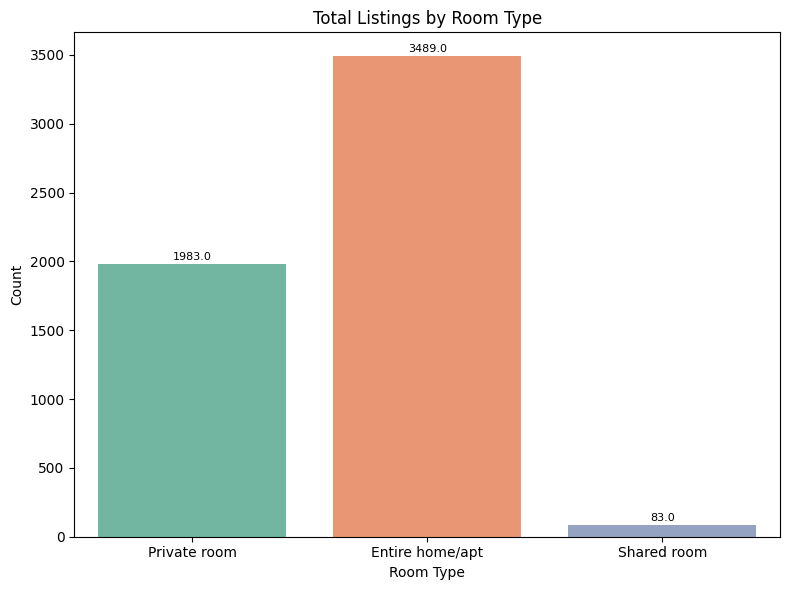

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Room_type', hue='Room_type', dodge=False, palette='Set2', legend=False)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), 
                textcoords='offset points')

ax.set_title("Total Listings by Room Type")
ax.set_xlabel("Room Type")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()



C:\Users\Dell\AppData\Local\Temp\ipykernel_5740\2324006894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='Host_name', order=df['Host_name'].value_counts().index[:10], palette='viridis')


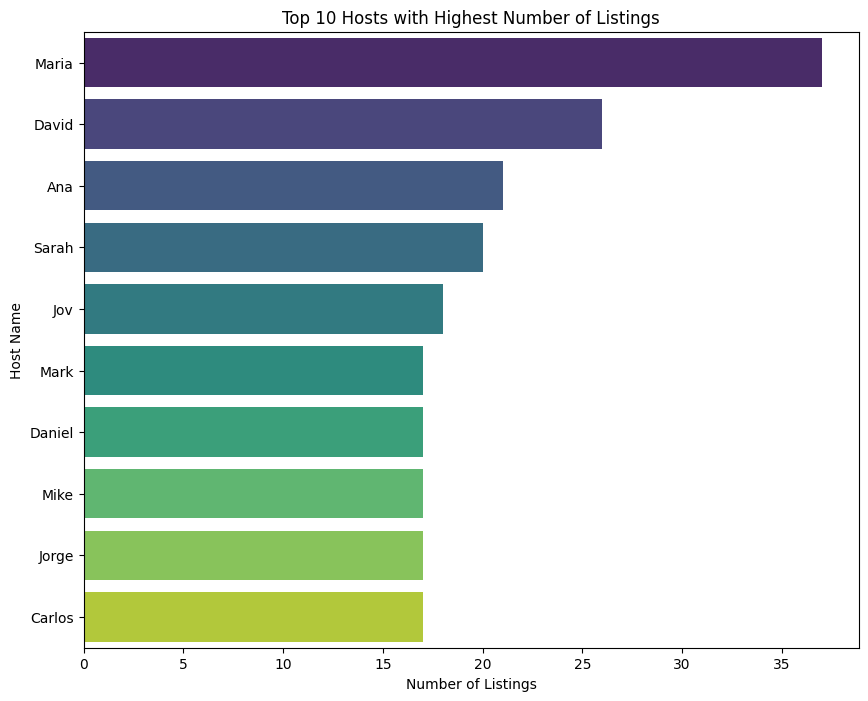

In [27]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, y='Host_name', order=df['Host_name'].value_counts().index[:10], palette='viridis')
ax.set_title("Top 10 Hosts with Highest Number of Listings")
ax.set_ylabel("Host Name")
ax.set_xlabel("Number of Listings")

plt.show()


In [28]:
print(df.columns)

Index(['Id', 'Listing_url', 'Name', 'Property_type', 'Room_type', 'Min_nights',
       'Max_nights', 'Cancellation_policy', 'Accommodates', 'Total_bedrooms',
       'Total_beds', 'Availability_365', 'Price', 'Security_deposit',
       'Cleaning_fee', 'Guests_included', 'No_of_reviews', 'Review_scores',
       'Amenities', 'Host_id', 'Host_name', 'Country', 'Longitude', 'Latitude',
       'Is_location_exact'],
      dtype='object')


In [29]:
# top 10 Hosts with Highest number of listings
df.Host_name.value_counts()

Host_name
Maria       37
David       26
Ana         21
Sarah       20
Jov         18
            ..
Yuk Ping     1
Javed        1
Stefan       1
Shan         1
Aliane       1
Name: count, Length: 3140, dtype: int64

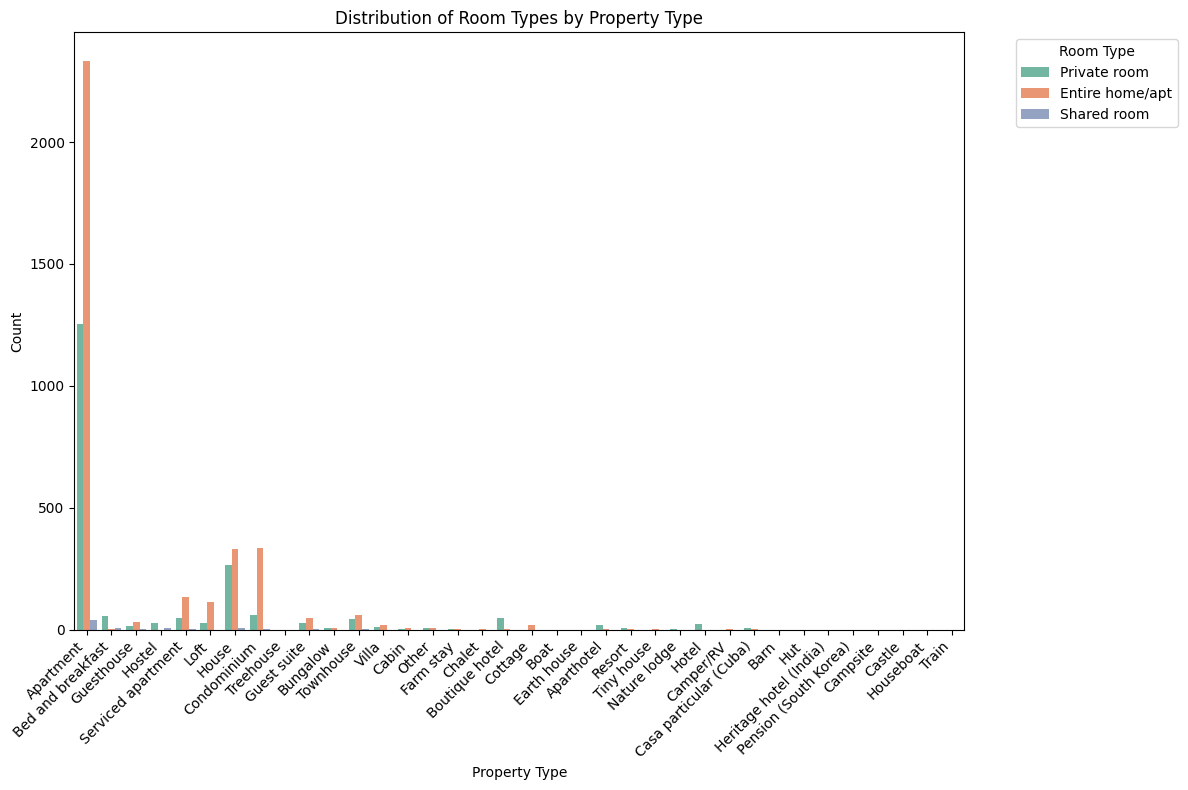

In [33]:
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.countplot(data=df, x='Property_type', hue='Room_type', palette='Set2', dodge=True)
plt.title('Distribution of Room Types by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

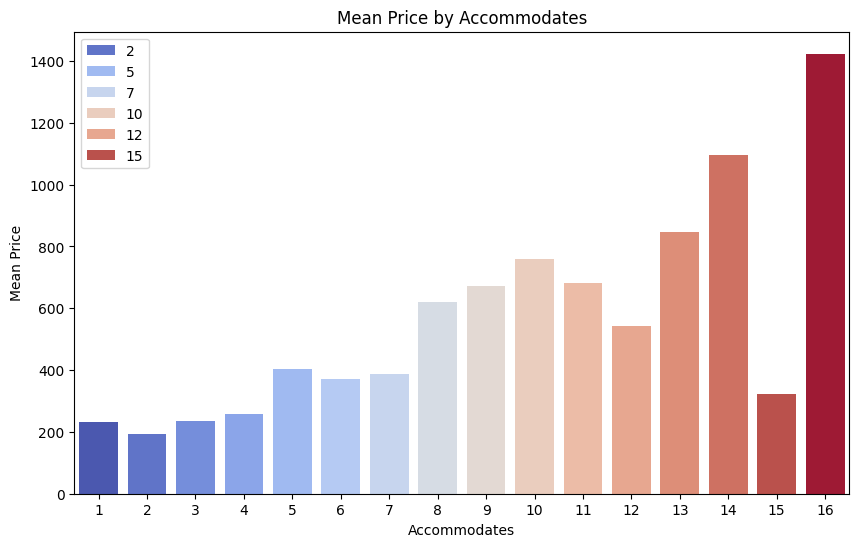

In [37]:
# Select the main two columns for correlation analysis
main_columns = ['Price', 'Accommodates']  # Replace with your main columns

# Extract the main columns from the DataFrame
main_df = df[main_columns]

# Group by 'Accommodates' and calculate the mean price for each group
mean_price_by_accommodates = main_df.groupby('Accommodates')['Price'].mean().reset_index()

# Bar chart showing the mean price for each value of 'Accommodates' with a different color palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Accommodates', y='Price', data=mean_price_by_accommodates, hue='Accommodates', dodge=False, palette='coolwarm')
plt.title('Mean Price by Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Mean Price')
plt.legend(title=None)
plt.show()


In [40]:
country_df = df.groupby('Country',as_index=False)['Price'].mean()
fig = px.scatter(data_frame=country_df,
           x='Country',y='Price',
           color='Country',
           size='Price',
           opacity=1,
           size_max=35,
           title='Avg Listing Price in each Countries')
fig.show()

In [41]:
# Group by 'Room_type' and calculate the mean price for each group
pr_df = df.groupby('Room_type', as_index=False)['Price'].mean()

# Sort values by mean price
pr_df = pr_df.sort_values(by='Price')

# Create a bar chart
fig = px.bar(pr_df, x='Room_type', y='Price', color='Price')
fig.update_layout(title='Mean Price by Room Type', xaxis_title='Room Type', yaxis_title='Mean Price')
fig.show()


In [63]:
#MySQL Connection:
mydb = mysql.connector.connect(host="localhost",user="root",password="")
print(mydb)
mycursor = mydb.cursor(buffered=True)


In [64]:
#mycursor.execute('CREATE DATABASE airbnb')
mycursor.execute('use airbnb')

In [ ]:
# Create the table if it doesn't exist
airbnb_data = """
CREATE TABLE IF NOT EXISTS airbnb_data (
    Id INT AUTO_INCREMENT PRIMARY KEY,
    Listing_url VARCHAR(255),
    Name VARCHAR(255),
    Description TEXT,
    House_rules TEXT,
    Property_type VARCHAR(255),
    Room_type VARCHAR(255),
    Bed_type VARCHAR(255),
    Min_nights INT,
    Max_nights INT,
    Cancellation_policy VARCHAR(255),
    Accommodates INT,
    Total_bedrooms INT,
    Total_beds INT,
    Availability_365 INT,
    Price FLOAT,
    Security_deposit FLOAT,
    Cleaning_fee FLOAT,
    Extra_people FLOAT,
    Guests_included INT,
    No_of_reviews INT,
    Review_scores FLOAT,
    Amenities TEXT,
    Host_id INT,
    Host_name VARCHAR(255),
    Street VARCHAR(255),
    Country VARCHAR(255),
    Country_code VARCHAR(255),
    Location_type VARCHAR(255),
    Longitude FLOAT,
    Latitude FLOAT,
    Is_location_exact VARCHAR(255)
);
"""
mycursor.execute(airbnb_data)

for row in df.itertuples():
    # Replace NaN values with None before inserting into the database
    row_data = [None if pd.isnull(value) else value for value in row[2:]]

    insert_query = """
    INSERT INTO airbnb_data (
        Listing_url, Name, Description, House_rules, Property_type, Room_type,
        Bed_type, Min_nights, Max_nights, Cancellation_policy, Accommodates,
        Total_bedrooms, Total_beds, Availability_365, Price, Security_deposit,
        Cleaning_fee, Extra_people, Guests_included, No_of_reviews,
        Review_scores, Amenities, Host_id, Host_name, Street, Country,
        Country_code, Location_type, Longitude, Latitude, Is_location_exact
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """

    # Check if the number of values matches the number of columns
    if len(row_data) == len(insert_query.split("VALUES")[1].split(",")):
        mycursor.execute(insert_query, row_data)
    else:
        print(f"Skipping row with mismatched data: {row_data}")
